# Лабораторна робота №4
### Диференційні рівняння
Авраменко Нікіта, група коп'ютерна математика

## Варіант 2
Приклад:
$$
A = 
 \begin{pmatrix}
  6 & 1 & -5 \\
  3 & 2 & -3 \\
  7 & 1 & -6 \\
 \end{pmatrix}\,,
 f(t) = 
 \begin{pmatrix}
  2\epsilon^{-2t} \\
  -\epsilon^{-2t} \\
  \epsilon^{-2t} + \epsilon^{-t} \\
 \end{pmatrix}
$$

Знайти загальний розв'язок відповідної однорідноїсистеми $y'= Ay$.

In [1]:
import numpy as np
from sympy import *
from sympy.abc import t, C
from numpy import linalg as LA
from sympy import symbols, IndexedBase, Idx
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [2]:
A = np.array([[6,1,-5],[3,2,-3],[7,1,-6]])
w, v = LA.eig(A)
print(w)
print(v)

[-1.  1.  2.]
[[-5.34522484e-01 -7.07106781e-01 -5.77350269e-01]
 [-2.67261242e-01  6.17789842e-16 -5.77350269e-01]
 [-8.01783726e-01 -7.07106781e-01 -5.77350269e-01]]


Загальний розв'язок однорідної системи y' = AY


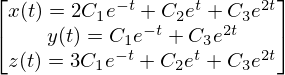

In [3]:
exp(5*t)
print(f"Загальний розв'язок однорідної системи y' = AY")
#C = IndexedBase('C')
#C[1]*exp(w[0]*t)*Matrix(v[:,0])+C[2]*exp(w[1]*t)*Matrix(v[:,1])+C[3]*exp(w[2]*t)*Matrix(v[:,2])
x, y, z = symbols('x, y, z', cls=Function)
eq = (Eq(Derivative(x(t),t), 6*x(t) + y(t) - 5*z(t)), Eq(Derivative(y(t),t), 3*x(t) + 2*y(t) - 3*z(t)),
     Eq(Derivative(z(t),t), 7*x(t) + y(t) - 6*z(t)))
q = dsolve(eq)
quat = Matrix([q[0],q[1], q[2]])
quat

Знайти розв'язок неоднорідної системи

In [4]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import x

In [5]:
A, B, C, D, N, M = symbols('A, B, C, D, N, M')

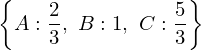

In [6]:
f1 = A*exp(-2*t)
f2 = B*exp(-2*t)
f3 = C*exp(-2*t)
ans1 = solve([diff(f1, t) - 6*f1 - f2 + 5*f3 - 2*exp(-2*t), diff(f2, t) - 3*f1 - 2*f2 + 3*f3 + exp(-2*t), 
       diff(f3, t) - 7*f1 - f2 + 6*f3 - exp(-2*t)],A,B,C)
ans1

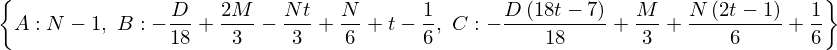

In [7]:
f1 = (A*t+B)*exp(-1*t)
f2 = (D*t+C)*exp(-1*t)
f3 = (N*t+M)*exp(-1*t)
ans2 = solve([diff(f1, t) - 6*f1 - f2 + 5*f3, diff(f2, t) - 3*f1 - 2*f2 + 3*f3, 
       diff(f3, t) - 7*f1 - f2 + 6*f3 - exp(-1*t)],(A,B,C,D,N,M))
ans2

In [8]:
ans2 = solve([A - ans2[A].subs([(t,0),(N,1)]), B - ans2[B].subs([(t,0),(N,1),(D,18),(M,3)]), C - ans2[C].subs([(t,0),(N,1),(D,18),(M,3)])],(A,B,C,D,N,M))
ans2[N] = 1
ans2[M] = 3
ans2[D] = 18
ans2

Розв'язок

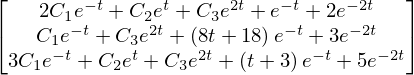

In [9]:
mtr = Matrix([[quat[0].rhs ],[quat[1].rhs ],[quat[2].rhs ]])+Matrix([[3*ans1[A]*exp(-2*t)+(ans2[A]*t+ans2[B])*exp(-1*t)],[3*ans1[B]*exp(-2*t)+(ans2[C]*t+ans2[D])*exp(-1*t)],
        [3*ans1[C]*exp(-2*t)+(ans2[N]*t+ans2[M])*exp(-1*t)]])
mtr

Знайти розв'язок задачі Коші

In [10]:
solve([mtr[0].subs(t,0),mtr[1].subs(t,0),mtr[2].subs(t,0)])

### Завдання 2
Розв'язати систему матричним методом

Приклад
$$
A = 
 \begin{pmatrix}
  3 & 0 \\
  0 & -2
 \end{pmatrix}\,
$$

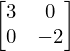

In [11]:
A = Matrix([[3,0],[0,-2]])
A

Матриця діагональна, тому e^(At) дорівнює

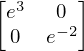

In [12]:
#from sympy.solvers.ode.systems import matrix_exp
#matrix_exp(A, t)
eA = Matrix([[exp(3),0],[0,exp(-2)]])
eA

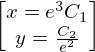

In [13]:
C = IndexedBase('C')
Mm = eA*Matrix([[C[1]],[C[2]]])
Mm[0] = Eq(x,Mm[0])
Mm[1] = Eq(y,Mm[1])
Mm